## 七月在线机器学习实训营三期第六周(机器学习)考试
#### 考试说明:
- 起止时间：请同学在2018年3月16日至3月18日期间完成，最晚提交时间本周日（3月18日24时之前）结束，<b>逾期不接受补考,该考试分数计入平时成绩</b>
- 考试方式：请同学<font color=red><b>拷贝</b></font>该试卷至自己姓名的目录后，将文件更名为同学姓名拼音-exam6后，进行作答。例如wangwei-exam6
- 提交格式：请同学新建自己姓名全拼的文件夹，将该试卷，数据文件，zip文件等相关考试文件，放置此目录下。将该目录<b>移动</b>至/0.Teacher/Exam/4/目录下
- 注意事项：为确保同学们真正了解自身对本周课程的掌握程度，<font color=red><b>请勿翻阅，移动，更改</b></font>其它同学试卷。如发现按0分处理
- 请同学在下方同学姓名处填写自己的姓名，批改人和最终得分不用填写

- 同学姓名:<u>石国瑞</u>  
- 批改人： David
- 最终得分:94

<center><h1>####答卷开始####</h1></center>
<hr>

## 简答题(共4题，每题5分，共计20分)

- note: 17分

#### 1. 请写出你了解的机器学习特征工程操作，以及它的意义（面试题）
- note: 缺少意义

- NAN（缺失值）处理
- 幅度缩放，标准化
- 高次特征和交叉特征
- 离散化/分箱/分桶处理
- 独热向量编码（one-hot encoding）

#### 2.请写出上述特征工程操作的sklearn或者pandas实现方式


- NAN（缺失值）处理：df.fillna(value使用mean等)
- 幅度缩放，标准化处理：np.log、sklearn.preprocessing.StandardScaler
- 高次特征和交叉特征: 添加二次项特征 
        poly = PolynomialFeatures(degree=2)
        fit_transform(df_train[[col1, col2]])
  
- 离散化/分箱/分桶处理: 将fare特征按取值范围分割为5段 pd.cut(xxx,5)
- 独热向量编码(one-hot encoding): pd.get_dummies(xxx)

#### 3.模型评估中的留一法，留出法，交叉验证分别是什么操作？

* 留一法：
    将数据切为K折，留出一折做模型验证
    
* 留出法：
    留出部分数据做用来做验证

* 交叉验证：
    将训练集切分为训练集、测试集、验证集，分别用于训练模型、预测、验证模型，交叉验证可以防止噪声数据干扰

#### 4.如何理解模型的过拟合与欠拟合，以及如何解决？（面试题）

* 模型过拟合与欠拟合 
    - 欠拟合：模型能力不够，无法很好的拟合数据，自然无法做准确的预测（train_data: 很糟糕 test_data: 很糟糕）
    - 过拟合：模型能力足够，无限制，导致过于匹配训练集，失去了一般性，也无法做出准确的预测（train_data: 非常好 test_data: 很糟糕）
    
    
* 解决办法：
    - 欠拟合：找更多的特征，减少正则化系数（正则化约束过度，减少约束）
    - 过拟合：减少特征（不推荐），增大正则化系数（约束不够，增加约束力），找更多的数据来学习（尤其单个模型过拟合）
    

## 操作题(共1题，共计80分)

- note: 77

### 信用卡欺诈项目(共7项，前5项每题10分，6，7题每题15分)

- 前期数据导入,预览及处理(此部分勿修改，涉及的数据文件无需复制移动)

In [1]:
import pandas as pd
pd.set_option('display.max_columns', 500)
import zipfile
with zipfile.ZipFile('/home/sxy-s3/0.Teacher/Exam/KaggleCredit2.csv.zip', 'r') as z:
    f = z.open('KaggleCredit2.csv')
    data = pd.read_csv(f, index_col=0)
data.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45.0,2.0,0.802982,9120.0,13.0,0.0,6.0,0.0,2.0
1,0,0.957151,40.0,0.0,0.121876,2600.0,4.0,0.0,0.0,0.0,1.0
2,0,0.658180,38.0,1.0,0.085113,3042.0,2.0,1.0,0.0,0.0,0.0
3,0,0.233810,30.0,0.0,0.036050,3300.0,5.0,0.0,0.0,0.0,0.0
4,0,0.907239,49.0,1.0,0.024926,63588.0,7.0,0.0,1.0,0.0,0.0


In [2]:
data.shape

(112915, 11)

In [3]:
data.isnull().sum(axis=0)

SeriousDlqin2yrs                           0
RevolvingUtilizationOfUnsecuredLines       0
age                                     4267
NumberOfTime30-59DaysPastDueNotWorse       0
DebtRatio                                  0
MonthlyIncome                              0
NumberOfOpenCreditLinesAndLoans            0
NumberOfTimes90DaysLate                    0
NumberRealEstateLoansOrLines               0
NumberOfTime60-89DaysPastDueNotWorse       0
NumberOfDependents                      4267
dtype: int64

In [4]:
data.dropna(inplace=True)
data.shapey = data['SeriousDlqin2yrs']
X = data.drop('SeriousDlqin2yrs', axis=1)

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  


In [5]:
y = data['SeriousDlqin2yrs']
X = data.drop('SeriousDlqin2yrs', axis=1)
y.mean()

0.06742876076872101

- 1.把数据切分成训练集和测试集

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
X_train.head()

(76053, 10) (32595, 10) (76053,) (32595,)


,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
64329,0.116959,27.0,0.0,0.326024,3100.0,7.0,0.0,0.0,0.0,1.0
70087,0.050666,83.0,0.0,0.177182,10000.0,9.0,0.0,1.0,0.0,0.0
77642,0.038865,72.0,0.0,0.016600,5722.0,7.0,0.0,0.0,0.0,0.0
6017,0.023513,56.0,0.0,0.266260,10500.0,8.0,0.0,2.0,0.0,3.0
106521,0.039350,83.0,0.0,0.195179,1700.0,3.0,0.0,0.0,0.0,0.0


- 2.使用logistic regression建模，并且输出一下系数，分析重要度。   

In [7]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(C=0.01,penalty='l1',random_state=0)
lr.fit(X_train,y_train)

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [8]:
lr.intercept_

array([-1.09135387])

In [9]:
lr.coef_

array([[-5.54037950e-05, -3.20762185e-02,  3.71777947e-01,
         4.92433473e-01, -3.08642956e-05, -1.27869403e-02,
         1.90476089e-01, -3.49039261e-02, -5.23072932e-01,
         8.33314936e-02]])

- note: 此处如果要使用可视化的话，用BARPLOT，而且应该有正负值出现的。

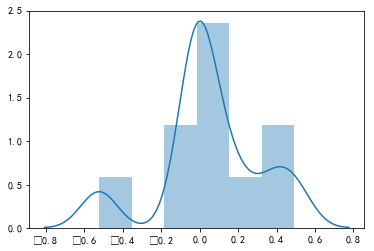

In [10]:
%matplotlib inline

import seaborn as sns

sns.distplot(lr.coef_)

- 3.使用决策树/SVM/KNN...等sklearn分类算法进行分类，尝试了解参数含义，调整不同的参数。

In [11]:
#DecisionTree
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
tree.fit(X_train, y_train)
#params:
#criterion: 分类标准，默认为基尼系数，示例用熵entropy string, optional (default=”gini”)
#max_depth: 最大深度，int or None, optional (default=None)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [12]:
# #svm
from sklearn.svm import SVC

svm = SVC(kernel='linear', C=1.0, random_state=0, max_iter=1000)
svm.fit(X_train, y_train)
#kernel: 核函数，可以用rbf（高斯核），linear，poly（多项式）等，string, optional (default=’rbf’)
#max_iter: Hard limit on iterations within solver, or -1 for no limit.

/usr/local/lib/python3.5/dist-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=1000, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)

In [13]:
#KNN
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5, p=2, metric='minkowski')
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

- 4.在测试集上进行预测，计算准确度

In [14]:
y_pred_lr = lr.predict(X_test)
print('LogisticRegression:')
print('LR Training accuracy:', lr.score(X_train, y_train))
print('LR Test accuracy:', lr.score(X_test, y_test))
print('LR Misclassified samples: %d' % (y_test != y_pred_lr).sum())
print('----------------------------------------------------------')

y_pred_tree = tree.predict(X_test)
print('DecisionTreeClassifier:')
print('DT Training accuracy:', tree.score(X_train, y_train))
print('DT Test accuracy:', tree.score(X_test, y_test))
print('DT Misclassified samples: %d' % (y_test != y_pred_tree).sum())
print('----------------------------------------------------------')

y_pred_svm = svm.predict(X_test)
print('svm-SVC:')
print('svm Training accuracy:', svm.score(X_train, y_train))
print('svm Test accuracy:', svm.score(X_test, y_test))
print('svm Misclassified samples: %d' % (y_test != y_pred_svm).sum())
print('----------------------------------------------------------')

y_pred_knn = knn.predict(X_test)
print('KNeighborsClassifier:')
print('KNN Training accuracy:', lr.score(X_train, y_train))
print('KNN Test accuracy:', lr.score(X_test, y_test))
print('KNN Misclassified samples: %d' % (y_test != y_pred_knn).sum())
print('----------------------------------------------------------')

LogisticRegression:
LR Training accuracy: 0.9324681472131277
LR Test accuracy: 0.9333333333333333
LR Misclassified samples: 2173
----------------------------------------------------------
DecisionTreeClassifier:
DT Training accuracy: 0.9342169276688626
DT Test accuracy: 0.935020708697653
DT Misclassified samples: 2118
----------------------------------------------------------
svm-SVC:
svm Training accuracy: 0.9309428950863213
svm Test accuracy: 0.9321675103543489
svm Misclassified samples: 2211
----------------------------------------------------------
KNeighborsClassifier:
KNN Training accuracy: 0.9324681472131277
KNN Test accuracy: 0.9333333333333333
KNN Misclassified samples: 2213
----------------------------------------------------------


- 5.查看sklearn的官方说明，了解混淆矩阵等评估标准，并对此例进行评估。

In [15]:
from sklearn.metrics import confusion_matrix

cfs_mtrx_lr = confusion_matrix(y_test,y_pred_lr)
print('LogisticRegression:')
print(cfs_mtrx_lr)
print('----------------------------------------------------------')

cfs_mtrx_dt = confusion_matrix(y_test,y_pred_tree)
print('DecisionTreeClassifier:')
print(cfs_mtrx_dt)
print('----------------------------------------------------------')

cfs_mtrx_svm = confusion_matrix(y_test,y_pred_svm)
print('svm-SVC:')
print(cfs_mtrx_svm)
print('----------------------------------------------------------')

cfs_mtrx_knn = confusion_matrix(y_test,y_pred_knn)
print('KNeighborsClassifier:')
print(cfs_mtrx_knn)
print('----------------------------------------------------------')

LogisticRegression:
[[30394    30]
 [ 2143    28]]
----------------------------------------------------------
DecisionTreeClassifier:
[[30104   320]
 [ 1798   373]]
----------------------------------------------------------
svm-SVC:
[[30381    43]
 [ 2168     3]]
----------------------------------------------------------
KNeighborsClassifier:
[[30351    73]
 [ 2140    31]]
----------------------------------------------------------


- 6.银行通常会有更严格的要求，因为fraud带来的后果通常比较严重，一般我们会调整模型的标准。   
比如在logistic regression当中，一般我们的概率判定边界为0.5，但是我们可以把阈值设定低一些，来提高模型的“敏感度”   
试试看把阈值设定为0.3，再看看这个时候的混淆矩阵等评估指标。

In [16]:
lr_03 = LogisticRegression(C=0.01,penalty='l1',random_state=0, fit_intercept=0.3)
lr_03.fit(X_train,y_train)
y_pred_lr_03 = lr.predict(X_test)

cfs_mtrx_lr_03 = confusion_matrix(y_test,y_pred_lr_03)

print('LogisticRegression: fit_intercept = 0.3')
print(cfs_mtrx_lr_03)
print('----------------------------------------------------------')

LogisticRegression: fit_intercept = 0.3
[[30394    30]
 [ 2143    28]]
----------------------------------------------------------


- 7.尝试对不同特征的重要度进行排序，通过特征选择的方式，对特征进行筛选。并重新建模，观察此时的模型准确率等评估指标。

 1) RevolvingUtilizationOfUnsecuredLines 0.182879
 2) DebtRatio                      0.172134
 3) MonthlyIncome                  0.165537
 4) age                            0.121755
 5) NumberOfTimes90DaysLate        0.112320
 6) NumberOfOpenCreditLinesAndLoans 0.089805
 7) NumberOfDependents             0.046563
 8) NumberOfTime30-59DaysPastDueNotWorse 0.044288
 9) NumberOfTime60-89DaysPastDueNotWorse 0.032814
10) NumberRealEstateLoansOrLines   0.031905


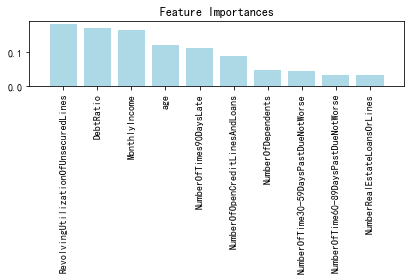

In [17]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import matplotlib.pyplot as plt

feat_labels = X.columns

forest = RandomForestClassifier(n_estimators=10, random_state=0, n_jobs=-1)
forest.fit(X_train, y_train)


importances = forest.feature_importances_

indices = np.argsort(importances)[::-1]
for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, 
                            feat_labels[indices[f]], 
                            importances[indices[f]]))

plt.title('Feature Importances')
plt.bar(range(X_train.shape[1]), 
        importances[indices],
        color='lightblue', 
        align='center')

plt.xticks(range(X_train.shape[1]), 
           feat_labels[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
#plt.savefig('./random_forest.png', dpi=300)
plt.show()

In [18]:
#去掉重要度小于0.01的列
drop_labels = []
for index in indices[5:]:
#     print(index)
    drop_labels.append(feat_labels[index])    
drop_labels

['NumberOfOpenCreditLinesAndLoans',
 'NumberOfDependents',
 'NumberOfTime30-59DaysPastDueNotWorse',
 'NumberOfTime60-89DaysPastDueNotWorse',
 'NumberRealEstateLoansOrLines']

In [19]:
#更新训练集
X_new = data.drop(labels=drop_labels, axis=1)
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.3, random_state=0)

X_new.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,DebtRatio,MonthlyIncome,NumberOfTimes90DaysLate
0,1,0.766127,45.0,0.802982,9120.0,0.0
1,0,0.957151,40.0,0.121876,2600.0,0.0
2,0,0.658180,38.0,0.085113,3042.0,1.0
3,0,0.233810,30.0,0.036050,3300.0,0.0
4,0,0.907239,49.0,0.024926,63588.0,0.0


In [20]:
#重新训练模型
lr = LogisticRegression(C=0.01,penalty='l1',random_state=0)
lr.fit(X_train,y_train)

#做预测
y_pred = lr.predict(X_test)
print('LogisticRegression:')
print('LR Training accuracy:', lr.score(X_train, y_train))
print('LR Test accuracy:', lr.score(X_test, y_test))
print('LR Misclassified samples: %d' % (y_test != y_pred).sum())
print('----------------------------------------------------------')

#混淆矩阵
cfs_mtrx = confusion_matrix(y_test,y_pred)
print('LogisticRegression confusion_matrix:')
print(cfs_mtrx)
print('----------------------------------------------------------')

### 我去。。。这提升也太大了，果然寒小阳老师诚不我欺，特征极其重要，干扰原来不只是来自数据，不重要特征影响也这么大

LogisticRegression:
LR Training accuracy: 0.9999474050990756
LR Test accuracy: 0.9999079613437644
LR Misclassified samples: 3
----------------------------------------------------------
LogisticRegression confusion_matrix:
[[30424     0]
 [    3  2168]]
----------------------------------------------------------


### 本阶段课程意见反馈题(5分送分项，非必答)
#### 请同学围绕以下两点进行回答：
- 自身总结：请您对您自己在本周课程的学习，收获，技能掌握等方面进行一次总结 ，也包括有哪些方面存在哪些不足，欠缺，困惑。作为将来回顾学习路径时的依据。


开始有点蒙，第8期基础课看得不够，后来把第8期相关基础课看了，再实际去敲了一些示例，基本上就提升了很多。

- 课程反馈：请就知识点，进度，难易度，教学方式，考试方式及难易度等方面向我们反馈，督促我们进行更有效的改进。

最开始还是不太适应加速的课程，后来随着进度进行，慢慢地感觉这周收获还是特别大的。
顺便给寒小阳老师，加号老师，svm和图论那个冯老师，还有讲k-means的Johnson点赞，几位太给力了。

<hr>
<center><h1>####答卷结束####</h1></center>